In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import great_expectations as gx

In [3]:
df = pd.read_csv('../data/raw/adult.csv')

In [4]:
df.shape

(48842, 15)

In [5]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

## Ausprägungen und Counts der kategorischen Spalten betrachten

In [6]:
df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [7]:
df['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [8]:
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [9]:
df['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [10]:
df['relationship'].value_counts()

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

In [11]:
df['race'].value_counts()

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

In [12]:
df['gender'].value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

In [13]:
df['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [14]:
df['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

## Wie viele Zeilen mit Fragezeichen gibt es insgesamt?

In [15]:
df.isin(['?']).any(axis=1).sum()

3620

## Numerische Spalten genauer inspizieren

- Wie sind die numerischen Werte über die Spannweite verteilt? Gleich oder Ungleich?
- Macht es Sinn die Werte zu kategorisieren?

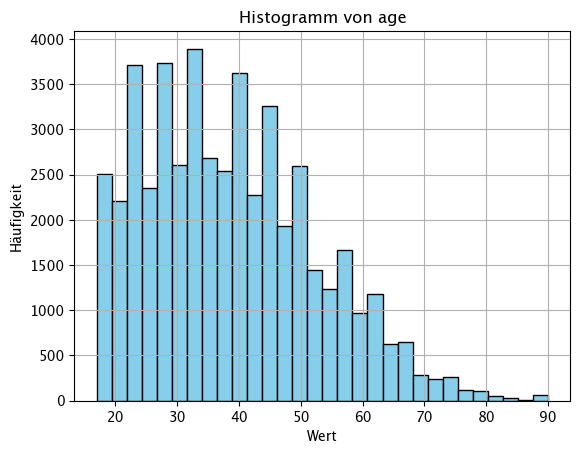

In [16]:
df['age'].hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.title('Histogramm von age')
plt.show()

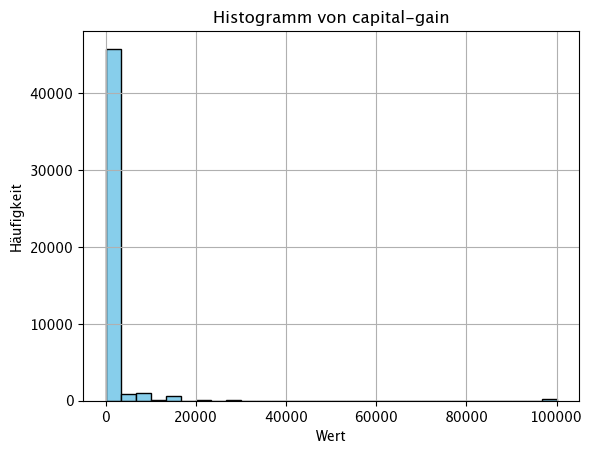

In [17]:
df['capital-gain'].hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.title('Histogramm von capital-gain')
plt.show()

In [18]:
(df['capital-gain'] == 0).sum()

44807

(array([1.038e+03, 9.000e+02, 9.630e+02, 9.500e+01, 6.560e+02, 5.100e+01,
        1.000e+00, 2.000e+01, 5.800e+01, 0.000e+00, 6.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.440e+02]),
 array([  114. ,  3443.5,  6773. , 10102.5, 13432. , 16761.5, 20091. ,
        23420.5, 26750. , 30079.5, 33409. , 36738.5, 40068. , 43397.5,
        46727. , 50056.5, 53386. , 56715.5, 60045. , 63374.5, 66704. ,
        70033.5, 73363. , 76692.5, 80022. , 83351.5, 86681. , 90010.5,
        93340. , 96669.5, 99999. ]),
 <BarContainer object of 30 artists>)

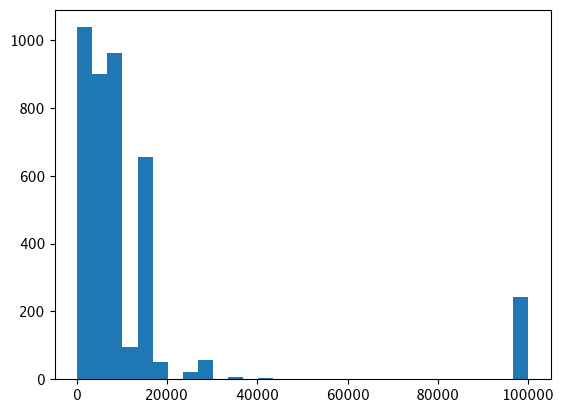

In [19]:
cap_gain = [i for i in df['capital-gain'] if i!=0]

plt.hist(cap_gain, bins=30)

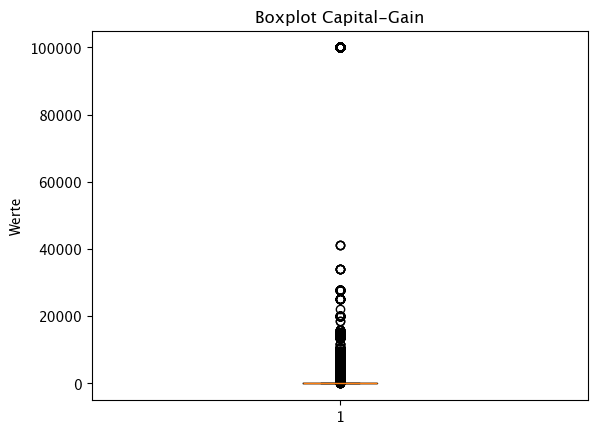

In [20]:
# Boxplot zeichnen
plt.boxplot(df['capital-gain'])

# Titel und Achsenbeschriftung hinzufügen
plt.title('Boxplot Capital-Gain')
plt.ylabel('Werte')

# Plot anzeigen
plt.show()

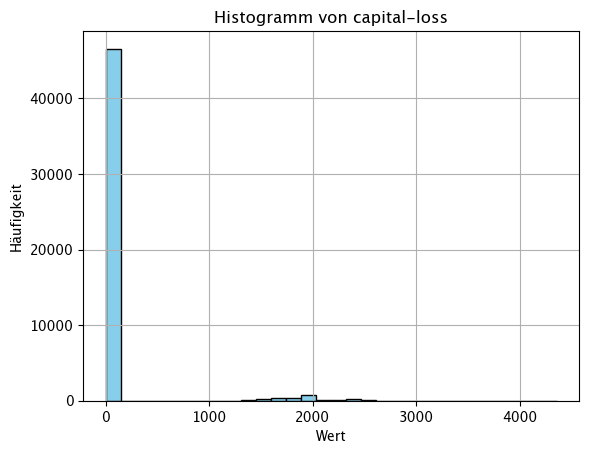

In [21]:
df['capital-loss'].hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.title('Histogramm von capital-loss')
plt.show()

In [22]:
(df['capital-loss'] == 0).sum()

46560

(array([  6.,   8.,   0.,  21.,   2.,   8.,  11.,  10.,  60., 105., 361.,
        211., 699., 415.,  89., 109., 104.,  29.,   2.,  14.,   5.,   2.,
          0.,   0.,   0.,   6.,   2.,   0.,   0.,   3.]),
 array([ 155.        ,  295.03333333,  435.06666667,  575.1       ,
         715.13333333,  855.16666667,  995.2       , 1135.23333333,
        1275.26666667, 1415.3       , 1555.33333333, 1695.36666667,
        1835.4       , 1975.43333333, 2115.46666667, 2255.5       ,
        2395.53333333, 2535.56666667, 2675.6       , 2815.63333333,
        2955.66666667, 3095.7       , 3235.73333333, 3375.76666667,
        3515.8       , 3655.83333333, 3795.86666667, 3935.9       ,
        4075.93333333, 4215.96666667, 4356.        ]),
 <BarContainer object of 30 artists>)

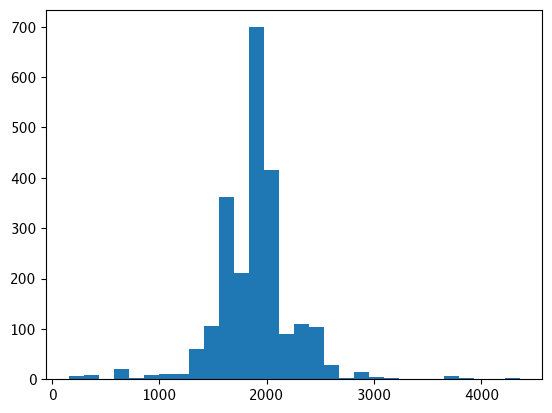

In [23]:
cap_loss = [i for i in df['capital-loss'] if i!=0]

plt.hist(cap_loss, bins=30)

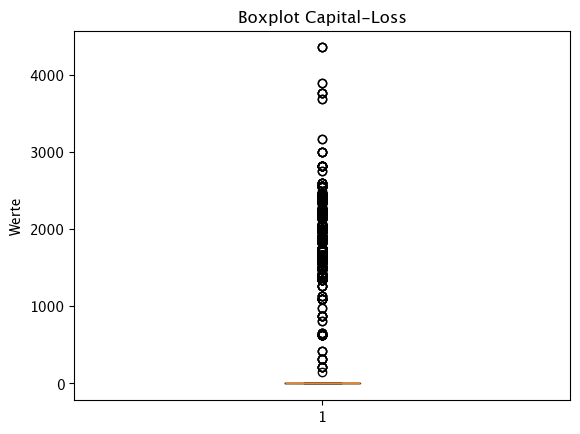

In [24]:
# Boxplot zeichnen
plt.boxplot(df['capital-loss'])

# Titel und Achsenbeschriftung hinzufügen
plt.title('Boxplot Capital-Loss')
plt.ylabel('Werte')

# Plot anzeigen
plt.show()

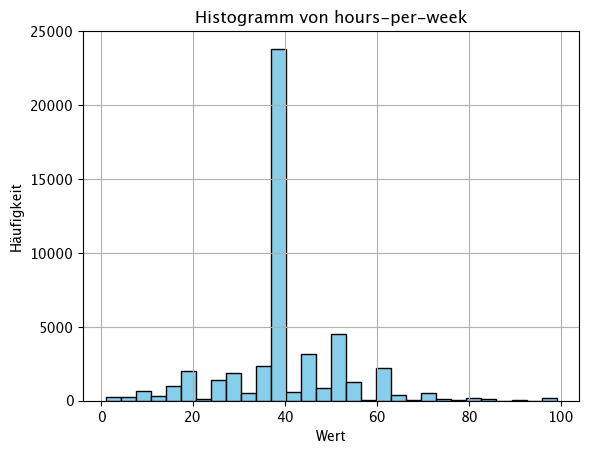

In [25]:
df['hours-per-week'].hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.title('Histogramm von hours-per-week')
plt.show()

In [26]:
context = gx.get_context()
data_source = context.data_sources.add_pandas(name = "my_pandas_datasource")
data_asset = data_source.add_dataframe_asset(name = "my_dataframe_asset")
batch_definition = data_asset.add_batch_definition_whole_dataframe(name = "my_batch_definition")
batch = batch_definition.get_batch(batch_parameters={"dataframe": df})

cap_loss_quantile_expect = gx.expectations.ExpectColumnQuantileValuesToBeBetween(
    column="capital-loss",
    quantile_ranges={
        "quantiles": [0.90],
        "value_ranges": [[None, 100]]
    }
)

cap_gain_quantile_expect = gx.expectations.ExpectColumnQuantileValuesToBeBetween(
    column="capital-gain",
    quantile_ranges={
        "quantiles": [0.90],
        "value_ranges": [[None, 100]]
    }
)


validation_results = batch.validate(expect= cap_loss_quantile_expect)


print(validation_results.success)

/Users/yanoothan/Master/MLOperation/PortfolioProjekt/MLOPs/income-venv/lib/python3.12/site-packages/posthog/client.py:310: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  timestamp = datetime.utcnow().replace(tzinfo=tzutc())
Calculating Metrics: 100%|██████████| 4/4 [00:00<00:00, 1010.61it/s]

True


/Users/yanoothan/Master/MLOperation/PortfolioProjekt/MLOPs/income-venv/lib/python3.12/site-packages/posthog/request.py:26: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  body["sentAt"] = datetime.utcnow().replace(tzinfo=tzutc()).isoformat()
